# Exploring the Weather in Athens


The purpose of this assignment is to gain insight about the weather in Athens and the impact of climate change through the examination of data over a period of more than 50 years.

---
> Natalia Katsiapi, 810040 <br/>
> Department of Management Science and Technology <br/>
> Athens University of Economics and Business <br/>
> t8180040@aueb.gr

## Obtain the Data

The data for the Hellinikon weather station can be obtained from National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:GR000016716/detail) in CSV format.

They are ready to be loaded with Pandas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv("athens_data.csv", parse_dates=["DATE"])
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.00,NaN,NaN,65.0,50.0
1,GR000016716,1955-01-02,0.08,NaN,NaN,58.0,45.0
2,GR000016716,1955-01-03,0.00,NaN,NaN,60.0,49.0
3,GR000016716,1955-01-04,0.00,NaN,NaN,66.0,45.0
4,GR000016716,1955-01-05,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,2020-12-29,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,2020-12-30,0.00,NaN,62.0,68.0,59.0


The first thing to do is to convert columns to millimeters (instead of inches) and Celsius degrees (instead of Fahrenheit).

In [2]:
def inches_to_mm(p):
    return p * 2.54 * 10

data["PRCP"] = data["PRCP"].apply(inches_to_mm)
data.head()

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.000,NaN,NaN,65.0,50.0
1,GR000016716,1955-01-02,2.032,NaN,NaN,58.0,45.0
2,GR000016716,1955-01-03,0.000,NaN,NaN,60.0,49.0
3,GR000016716,1955-01-04,0.000,NaN,NaN,66.0,45.0
4,GR000016716,1955-01-05,0.000,NaN,NaN,64.0,47.0


In [3]:
def fahrenheit_to_celsius(t):
    return 5/9 * (t - 32)

data[["TAVG", "TMAX", "TMIN"]] = data[["TAVG", "TMAX", "TMIN"]].apply(fahrenheit_to_celsius)
data.head()

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,GR000016716,1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,GR000016716,1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,GR000016716,1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,GR000016716,1955-01-05,0.000,NaN,NaN,17.777778,8.333333


Moving on, we will see some basic statistics on the data with ```describe()```. It seems that there is an extreme value for precipitaion (141.986). We can see that because 75% of the other values are below 0. However, it is not safe to discard it, because heavy rain can have more than 50mm of precipitation (https://en.wikipedia.org/wiki/Rain).

In [4]:
data.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,22773.000000,30.000000,20940.000000,22307.000000,22418.000000
mean,1.010892,6.006667,18.269208,22.347594,14.470886
std,4.633631,13.950922,6.928674,7.394020,6.461972
min,0.000000,0.400000,-2.222222,1.111111,-4.444444
25%,0.000000,0.400000,12.777778,16.666667,9.444444
50%,0.000000,0.800000,17.777778,21.666667,14.444444
75%,0.000000,1.600000,24.444444,28.888889,20.000000
max,141.986000,48.800000,35.000000,42.222222,30.555556


We will start with processing the data before 2010, about which there is not extra available data. As we notice, a significant number of average temperatures is missing till 1974.

In [5]:
before_2010 = data.DATE.dt.year < 2010
data[before_2010 & data.TAVG.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,GR000016716,1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,GR000016716,1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,GR000016716,1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,GR000016716,1955-01-05,0.000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...
7166,GR000016716,1974-08-15,0.000,NaN,NaN,30.555556,21.666667
7167,GR000016716,1974-08-16,0.000,NaN,NaN,31.666667,22.777778
7455,GR000016716,1975-05-31,0.000,NaN,NaN,29.444444,21.666667
7958,GR000016716,1976-10-15,0.000,NaN,NaN,23.888889,17.777778


An idea obtained from [here](https://earthscience.stackexchange.com/questions/18587/how-to-calculate-maximum-and-minimum-mean-monthly-temperatures) is to fill the ```TAVG``` with the average temperature between ```TMAX``` and ```TMIN```. Unfortunately, hourly data is missing, and that is why we are limited to daily minimum and maximum temperatures, although this is not the most accurate estimation (there is no clue that temperature is normally distributed between max and min during the day).

In [6]:
data.loc[before_2010, 'TAVG'] = data.loc[before_2010, 'TAVG'].fillna(value=(data.TMAX + data.TMIN) / 2)
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.000,NaN,14.166667,18.333333,10.000000
1,GR000016716,1955-01-02,2.032,NaN,10.833333,14.444444,7.222222
2,GR000016716,1955-01-03,0.000,NaN,12.500000,15.555556,9.444444
3,GR000016716,1955-01-04,0.000,NaN,13.055556,18.888889,7.222222
4,GR000016716,1955-01-05,0.000,NaN,13.055556,17.777778,8.333333
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,6.604,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.000,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.000,NaN,16.666667,20.000000,15.000000


In [7]:
data[data.TAVG.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
798,GR000016716,1957-03-09,0.254,NaN,NaN,16.666667,NaN


We still have a date with null values, since ```TMIN``` is ```NaN```. What we can do is use the average of the previous and the next year.

In [8]:
data.loc[798, "TAVG"] = (data.loc[797, "TAVG"] + data.loc[799, "TAVG"]) / 2
data.iloc[797:800]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
797,GR000016716,1957-03-08,0.508,NaN,13.611111,17.222222,10.000000
798,GR000016716,1957-03-09,0.254,NaN,11.805556,16.666667,NaN
799,GR000016716,1957-03-10,0.000,NaN,10.000000,12.222222,7.777778


Now we will examine ```TMAX``` and ```TMIN``` columns.

In [9]:
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
798,GR000016716,1957-03-09,0.254,NaN,11.805556,16.666667,NaN
4119,GR000016716,1966-04-12,0.000,NaN,17.777778,22.222222,NaN
4335,GR000016716,1966-11-14,0.000,NaN,17.222222,19.444444,NaN
9102,GR000016716,1979-12-03,1.016,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04,0.000,NaN,8.333333,NaN,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13,8.890,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.000,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,NaN,NaN


We will calculate them, based on the previous logic, using ```TAVG```.

In [10]:
data.loc[before_2010, 'TMAX'] = data.loc[before_2010, 'TMAX'].fillna(value=2 * data.TAVG - data.TMIN)
data.loc[before_2010, 'TMIN'] = data.loc[before_2010, 'TMIN'].fillna(value=2 * data.TAVG - data.TMAX)
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
9102,GR000016716,1979-12-03,1.016,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04,0.000,NaN,8.333333,NaN,NaN
18289,GR000016716,2005-01-27,NaN,NaN,12.777778,NaN,NaN
18293,GR000016716,2005-01-31,11.176,NaN,5.555556,NaN,NaN
18296,GR000016716,2005-02-03,NaN,NaN,3.888889,NaN,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13,8.890,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.000,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,NaN,NaN


There are still missing values.

In [11]:
data[before_2010 & (data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna())]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
1911,GR000016716,1960-03-26,NaN,NaN,12.222222,16.111111,8.333333
1974,GR000016716,1960-05-28,NaN,NaN,20.555556,23.888889,17.222222
2093,GR000016716,1960-09-24,NaN,NaN,20.277778,23.333333,17.222222
2210,GR000016716,1961-01-19,NaN,NaN,2.222222,3.333333,0.555556
2291,GR000016716,1961-04-10,NaN,NaN,19.444444,23.333333,15.000000
...,...,...,...,...,...,...,...
20013,GR000016716,2009-10-20,NaN,NaN,20.000000,22.222222,17.777778
20064,GR000016716,2009-12-10,0.000,NaN,13.333333,NaN,NaN
20067,GR000016716,2009-12-13,NaN,NaN,10.000000,12.222222,7.777778
20075,GR000016716,2009-12-21,0.254,NaN,10.555556,NaN,NaN


We will see how many are these values.

In [12]:
data[before_2010 & (data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna())].count() / data[before_2010].count()

STATION    0.018869
DATE       0.018869
PRCP       0.001571
SNWD       0.000000
TAVG       0.018869
TMAX       0.016813
TMIN       0.016813
dtype: float64

So, about 0.02% of the rows have missing values. This is not a significant percentage, so we can ignore them. 

The same steps will be repeated for the 2020 dates.

In [13]:
dates_2020 = data.DATE.dt.year == 2020
data.loc[dates_2020 & (data.TMIN.isna() | data.TMAX.isna() | data.PRCP.isna())]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
22885,GR000016716,2020-01-01,0.000,NaN,8.333333,11.666667,NaN
22888,GR000016716,2020-01-04,0.000,NaN,10.555556,NaN,5.555556
22889,GR000016716,2020-01-05,0.000,NaN,9.444444,13.333333,NaN
22890,GR000016716,2020-01-06,6.604,NaN,5.555556,7.222222,NaN
22895,GR000016716,2020-01-11,0.000,NaN,8.888889,NaN,6.111111
...,...,...,...,...,...,...,...
23232,GR000016716,2020-12-13,8.890,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.000,NaN,12.222222,NaN,11.111111
23244,GR000016716,2020-12-25,NaN,NaN,15.000000,19.444444,12.777778
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,NaN,NaN


In [14]:
data.loc[dates_2020, 'TAVG'] = data.loc[dates_2020, 'TAVG'].fillna(value=(data.TMAX + data.TMIN) / 2)
data.loc[dates_2020, 'TMAX'] = data.loc[dates_2020, 'TMAX'].fillna(value=2 * data.TAVG - data.TMIN)
data.loc[dates_2020, 'TMIN'] = data.loc[dates_2020, 'TMIN'].fillna(value=2 * data.TAVG - data.TMAX)
data.loc[dates_2020 & (data.TMIN.isna() | data.TMAX.isna() | data.PRCP.isna())]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
22924,GR000016716,2020-02-09,NaN,NaN,7.777778,12.222222,2.222222
22930,GR000016716,2020-02-15,1.016,NaN,12.222222,NaN,NaN
22935,GR000016716,2020-02-20,0.254,NaN,12.222222,NaN,NaN
22938,GR000016716,2020-02-23,NaN,NaN,11.111111,13.333333,8.888889
22942,GR000016716,2020-02-27,0.000,NaN,15.000000,NaN,NaN
22957,GR000016716,2020-03-13,NaN,NaN,19.444444,NaN,NaN
22958,GR000016716,2020-03-14,NaN,NaN,16.666667,21.666667,11.666667
22963,GR000016716,2020-03-19,NaN,NaN,11.666667,16.111111,8.333333
22964,GR000016716,2020-03-20,NaN,NaN,13.888889,19.444444,6.666667
22979,GR000016716,2020-04-04,1.778,NaN,12.222222,NaN,NaN


For ```TMIN``` and ```TMAX``` missing we will use the average of the previous and the next value. We will not change precipitation, since there are a lot missing values and the bias is high (wether it rained or not), even if we fill with a small value.

In [15]:
data.loc[dates_2020, 'TMIN'] = data.loc[dates_2020, 'TMIN'].fillna(value=(data.TMIN.shift(-1) + data.TMIN.shift(1)) / 2)
data.loc[dates_2020, 'TMAX'] = data.loc[dates_2020, 'TMAX'].fillna(value=(data.TMAX.shift(-1) + data.TMAX.shift(1)) / 2)
data.loc[dates_2020 & (data.TMIN.isna() | data.TMAX.isna() | data.PRCP.isna())]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
22924,GR000016716,2020-02-09,NaN,NaN,7.777778,12.222222,2.222222
22938,GR000016716,2020-02-23,NaN,NaN,11.111111,13.333333,8.888889
22957,GR000016716,2020-03-13,NaN,NaN,19.444444,20.833333,10.000000
22958,GR000016716,2020-03-14,NaN,NaN,16.666667,21.666667,11.666667
22963,GR000016716,2020-03-19,NaN,NaN,11.666667,16.111111,8.333333
22964,GR000016716,2020-03-20,NaN,NaN,13.888889,19.444444,6.666667
23006,GR000016716,2020-05-01,NaN,NaN,20.000000,25.000000,15.000000
23018,GR000016716,2020-05-13,NaN,NaN,22.777778,29.444444,16.666667
23030,GR000016716,2020-05-25,NaN,NaN,21.111111,25.000000,17.222222
23054,GR000016716,2020-06-18,NaN,NaN,25.555556,30.000000,20.000000


Now we will move on to the dates starting from 2010, for which we have a second dataset. Dataset's headings were found [here](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748). We will keep only the needed columns.

In [16]:
recent_data = pd.read_csv("athens.csv")
recent_data.columns = range(14)
recent_data = recent_data[[0, 1, 2, 3, 6]]
recent_data.columns = ["date", "avgt", "maxt", "mint", "prcp"]
recent_data.date = pd.to_datetime(recent_data.date)


If we see the data types, columns are not numeric, and can neither be converted due to line 513. We weill examine if ```2011-05-30``` is properly filled in the original dataset.

In [17]:
recent_data.loc[513]

date    2011-05-30 00:00:00
avgt                    ---
maxt                    ---
mint                    ---
prcp                     40
Name: 513, dtype: object

In [18]:
data.loc[data.DATE == "2011-05-30"]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
20600,GR000016716,2011-05-30,0.0,NaN,20.555556,24.444444,16.111111


It is complete, so we do not need line 513 from ```recent_data```.

In [19]:
recent_data.drop(recent_data[recent_data.avgt == "---"].index, inplace=True)

In [20]:
recent_data[["avgt", "maxt", "mint", "prcp"]] = recent_data[["avgt", "maxt", "mint", "prcp"]].apply(pd.to_numeric, errors='coerce', axis=1)

It would be easy to replace the part which is greater than 2010-01-02 with the recent dataset. However, as we see, they are not of the same shape.

In [21]:
data.loc[(data['DATE'] >= "2010-01-02") & (data['DATE'] <= "2019-12-31"), 'DATE']

20087   2010-01-02
20088   2010-01-03
20089   2010-01-04
20090   2010-01-05
20091   2010-01-06
           ...    
22880   2019-12-27
22881   2019-12-28
22882   2019-12-29
22883   2019-12-30
22884   2019-12-31
Name: DATE, Length: 2798, dtype: datetime64[ns]

In [22]:
recent_data.loc[recent_data['date'] >= "2010-01-02", 'date']

0      2010-01-02
1      2010-01-03
2      2010-01-04
3      2010-01-05
4      2010-01-06
          ...    
3646   2019-12-27
3647   2019-12-28
3648   2019-12-29
3649   2019-12-30
3650   2019-12-31
Name: date, Length: 3648, dtype: datetime64[ns]

Obviously some dates from the original dataset are missing. In order to be able to use the information from the aother dataset, it will be easier to join them with ```merge```. We will select outer join, so that we will be able to add the missing dates.

In [23]:
data = pd.merge(data, recent_data, how="outer", left_on='DATE', right_on='date')
data.tail(10)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
24093,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-10,26.5,26.6,26.4,47.0
24094,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-20,26.8,26.9,26.7,34.0
24095,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-21,24.0,24.1,23.9,32.0
24096,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-23,22.4,22.5,22.3,38.0
24097,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-27,22.1,22.2,22.0,55.0
24098,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-02,18.7,18.8,18.6,50.0
24099,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-08,17.8,17.9,17.7,34.0
24100,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-15,20.4,20.5,20.3,33.0
24101,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-27,17.8,17.9,17.7,38.0
24102,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2018-09-17,26.3,26.3,26.2,38.0


In [24]:
data.DATE.fillna(value=data.date, inplace=True)
data.TAVG.fillna(value=data.avgt, inplace=True)
data.TMAX.fillna(value=data.maxt, inplace=True)
data.TMIN.fillna(value=data.mint, inplace=True)
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
1911,GR000016716,1960-03-26,NaN,NaN,12.222222,16.111111,8.333333,NaT,NaN,NaN,NaN,NaN
1974,GR000016716,1960-05-28,NaN,NaN,20.555556,23.888889,17.222222,NaT,NaN,NaN,NaN,NaN
2093,GR000016716,1960-09-24,NaN,NaN,20.277778,23.333333,17.222222,NaT,NaN,NaN,NaN,NaN
2210,GR000016716,1961-01-19,NaN,NaN,2.222222,3.333333,0.555556,NaT,NaN,NaN,NaN,NaN
2291,GR000016716,1961-04-10,NaN,NaN,19.444444,23.333333,15.000000,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24098,NaN,2017-10-02,NaN,NaN,18.700000,18.800000,18.600000,2017-10-02,18.7,18.8,18.6,50.0
24099,NaN,2017-10-08,NaN,NaN,17.800000,17.900000,17.700000,2017-10-08,17.8,17.9,17.7,34.0
24100,NaN,2017-10-15,NaN,NaN,20.400000,20.500000,20.300000,2017-10-15,20.4,20.5,20.3,33.0
24101,NaN,2017-10-27,NaN,NaN,17.800000,17.900000,17.700000,2017-10-27,17.8,17.9,17.7,38.0


There are a few lines 
The station is missing for the new dates, however this is not a problem since it will not be used.

We still have 01-01-2010, where minimum temperature is missing. We can calculate it based on the previous and the next values.

In [25]:
data.TMIN.loc[20086] = (data.loc[20085].TMIN + data.loc[20087].TMIN) / 2
data.iloc[20085:20088]

C:\Users\kat26\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
20085,GR000016716,2009-12-31,0.0,NaN,14.444444,19.444444,9.444444,NaT,NaN,NaN,NaN,NaN
20086,GR000016716,2010-01-01,NaN,NaN,17.777778,21.666667,11.666667,NaT,NaN,NaN,NaN,NaN
20087,GR000016716,2010-01-02,0.0,NaN,16.111111,17.777778,13.888889,2010-01-02,15.6,15.7,15.5,45.0


We will drop the unnecessary columns and have some statistics to see if generally we can continue with the analysis, after we sort them by date (in order to read them more easily).


In [26]:
data = data.sort_values(by="DATE")
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
0,GR000016716,1955-01-01,0.000,NaN,14.166667,18.333333,10.000000,NaT,NaN,NaN,NaN,NaN
1,GR000016716,1955-01-02,2.032,NaN,10.833333,14.444444,7.222222,NaT,NaN,NaN,NaN,NaN
2,GR000016716,1955-01-03,0.000,NaN,12.500000,15.555556,9.444444,NaT,NaN,NaN,NaN,NaN
3,GR000016716,1955-01-04,0.000,NaN,13.055556,18.888889,7.222222,NaT,NaN,NaN,NaN,NaN
4,GR000016716,1955-01-05,0.000,NaN,13.055556,17.777778,8.333333,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,19.166667,12.222222,NaT,NaN,NaN,NaN,NaN
23247,GR000016716,2020-12-28,6.604,NaN,15.000000,18.333333,11.666667,NaT,NaN,NaN,NaN,NaN
23248,GR000016716,2020-12-29,0.000,NaN,16.111111,20.000000,12.222222,NaT,NaN,NaN,NaN,NaN
23249,GR000016716,2020-12-30,0.000,NaN,16.666667,20.000000,15.000000,NaT,NaN,NaN,NaN,NaN


In [27]:
data.drop(columns=['date', 'avgt', 'maxt', 'mint', "prcp"], inplace=True)
data
data.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,22773.000000,30.000000,24103.000000,24061.000000,24061.000000
mean,1.010892,6.006667,18.362447,22.172495,14.708243
std,4.633631,13.950922,6.905348,7.415809,6.592655
min,0.000000,0.400000,-2.222222,0.900000,-4.444444
25%,0.000000,0.400000,12.777778,16.666667,9.444444
50%,0.000000,0.800000,17.777778,21.666667,14.444444
75%,0.000000,1.600000,24.444444,28.333333,20.000000
max,141.986000,48.800000,35.000000,42.222222,34.700000


## Deviation of Summer Temperatures


We will start by obtaining the summer data between 1974 and 1999.

In [28]:
summer_1974_1999 = data.loc[(data.DATE.dt.year >= 1974) & (data.DATE.dt.year <= 1999) & (data.DATE.dt.month).between(6,8)]
summer_1974_1999

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
7091,GR000016716,1974-06-01,0.000,NaN,22.777778,26.666667,17.222222
7092,GR000016716,1974-06-02,0.000,NaN,23.333333,27.777778,20.000000
7093,GR000016716,1974-06-03,0.254,NaN,22.222222,26.666667,20.000000
7094,GR000016716,1974-06-04,2.540,NaN,21.111111,24.444444,18.333333
7095,GR000016716,1974-06-05,0.000,NaN,23.888889,31.666667,18.333333
...,...,...,...,...,...,...,...
16309,GR000016716,1999-08-27,0.000,NaN,24.444444,29.444444,21.111111
16310,GR000016716,1999-08-28,0.000,NaN,24.444444,29.444444,20.555556
16311,GR000016716,1999-08-29,0.000,NaN,25.555556,30.000000,20.000000
16312,GR000016716,1999-08-30,0.000,NaN,26.111111,31.666667,21.111111


Then, we will obtain all the summer temperatures.

In [29]:
summer = data[data.DATE.dt.month.between(6,8)]
summer.tail(70)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
23059,GR000016716,2020-06-23,8.382,NaN,22.777778,28.333333,18.333333
23060,GR000016716,2020-06-24,0.000,NaN,25.000000,28.333333,20.555556
23061,GR000016716,2020-06-25,0.000,NaN,26.111111,30.555556,20.555556
23062,GR000016716,2020-06-26,0.000,NaN,26.666667,30.555556,22.222222
23063,GR000016716,2020-06-27,0.000,NaN,27.222222,31.111111,23.888889
...,...,...,...,...,...,...,...
23124,GR000016716,2020-08-27,0.000,NaN,28.333333,34.444444,23.333333
23125,GR000016716,2020-08-28,0.000,NaN,29.444444,35.555556,22.222222
23126,GR000016716,2020-08-29,0.000,NaN,29.444444,35.555556,22.777778
23127,GR000016716,2020-08-30,0.000,NaN,27.777778,34.444444,22.222222


The first step is to group the data by year

In [30]:
summer_grouped = summer.groupby(data.DATE.dt.year)

Then, we will calculate the baseline average temperature.

In [31]:
summer_mean = summer_1974_1999.TAVG.mean()
summer_mean

26.226193794128612

The next step is to calculate the deviation from the baseline. We will create a new DataFrame, in ordet to be easier to plot.

In [32]:
deviations = []
for n, s in summer_grouped:
    deviation = s.TAVG.mean() - summer_mean
    deviations.append(deviation)
summer_devs = pd.DataFrame({
    "year": summer_grouped.groups.keys(),
    "dev": deviations
})
summer_devs.head(10)

,year,dev
0,1955,-0.293223
1,1956,0.923565
2,1957,1.150014
3,1958,0.814869
4,1959,0.168734
5,1960,0.307623
6,1961,0.392164
7,1962,1.285884
8,1963,1.322115
9,1964,0.096270


And we will create a new column for the rolling average deviation.

In [33]:
summer_devs['rolling_dev'] = summer_devs.dev.rolling(10, min_periods=1).mean()
summer_devs

,year,dev,rolling_dev
0,1955,-0.293223,-0.293223
1,1956,0.923565,0.315171
2,1957,1.150014,0.593452
3,1958,0.814869,0.648806
4,1959,0.168734,0.552792
...,...,...,...
61,2016,1.950135,1.953814
62,2017,1.853154,1.938794
63,2018,1.183226,1.862707
64,2019,1.787091,1.926717


The plot is the following:

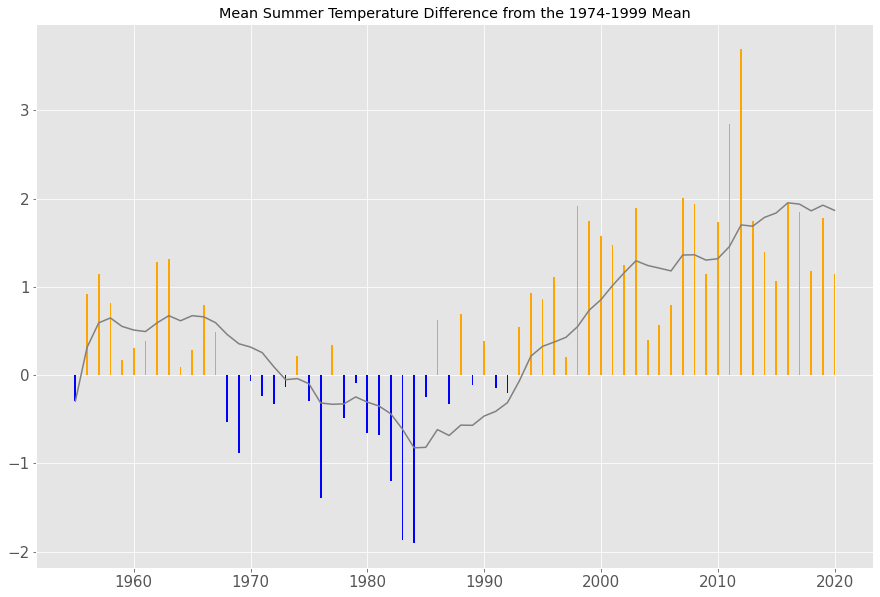

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='both', which='major', labelsize=15)
clrs = ['blue' if (dev < 0) else 'orange' for dev in summer_devs.dev ]
ax.bar(width=0.15, x="year", height="dev", align='center', data=summer_devs, color=clrs, edgecolor='none')
ax.plot("year", "rolling_dev", data=summer_devs, color="grey")
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.show()

### Conclusions
We can easily notice that the 21st century summers are far warmer than of the 20th. The most surprising value is in 2012, when the average temperature was more than 3 degrees higher. What is also remarkable, is the fact that there is not a certain rhythm of temperature rise over the years. However, seeing the rolling average, we can say that there is a tendency of rising temperatures since the mid 80s.    

## Evolution of Daily Temperatures

We will create two extra columns that will help in the groupings that follow: ```YEAR``` and ```DAY```. We will use a combination of the day and month, since, if we simply use the ```dayofyear```, we will have a shift for the leap years (366 days) when we draw them.

In [35]:
data['YEAR'] = data.DATE.dt.year
data['DAY'] = data.DATE.dt.strftime("%d%m")
data.head(100)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY
0,GR000016716,1955-01-01,0.000,NaN,14.166667,18.333333,10.000000,1955,0101
1,GR000016716,1955-01-02,2.032,NaN,10.833333,14.444444,7.222222,1955,0201
2,GR000016716,1955-01-03,0.000,NaN,12.500000,15.555556,9.444444,1955,0301
3,GR000016716,1955-01-04,0.000,NaN,13.055556,18.888889,7.222222,1955,0401
4,GR000016716,1955-01-05,0.000,NaN,13.055556,17.777778,8.333333,1955,0501
...,...,...,...,...,...,...,...,...,...
95,GR000016716,1955-04-06,0.000,NaN,11.944444,17.222222,6.666667,1955,0604
96,GR000016716,1955-04-07,0.000,NaN,10.833333,15.000000,6.666667,1955,0704
97,GR000016716,1955-04-08,0.000,NaN,10.833333,15.000000,6.666667,1955,0804
98,GR000016716,1955-04-09,0.000,NaN,12.222222,17.777778,6.666667,1955,0904


We will also create ```30day_rolling_avg``` column to smooth the daily temperatures using a 30 days rolling average. 

In [36]:
data['30day_rolling_avg'] = data.TAVG.rolling(30, min_periods=1).mean()
data.head()

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY,30day_rolling_avg
0,GR000016716,1955-01-01,0.000,NaN,14.166667,18.333333,10.000000,1955,0101,14.166667
1,GR000016716,1955-01-02,2.032,NaN,10.833333,14.444444,7.222222,1955,0201,12.500000
2,GR000016716,1955-01-03,0.000,NaN,12.500000,15.555556,9.444444,1955,0301,12.500000
3,GR000016716,1955-01-04,0.000,NaN,13.055556,18.888889,7.222222,1955,0401,12.638889
4,GR000016716,1955-01-05,0.000,NaN,13.055556,17.777778,8.333333,1955,0501,12.722222


Then, for the baseline (1974-1999) we will group by day and for each day we will calculate the average temperature.

In [37]:
avgs_for_1974_1999 = pd.DataFrame()
avgs_for_1974_1999['avg'] = data[(data.YEAR >= 1974) & (data.YEAR <= 1999)].groupby("DAY", sort=False).mean().TAVG
avgs_for_1974_1999

,avg
DAY,
0101,10.363248
0201,10.705128
0301,10.213675
0401,9.594017
0501,9.957265
...,...
2812,10.213675
2912,10.790598
3012,11.346154


As we notice in the previous output, 29/02 is at the bottom of the DataFrame. That happens because the first year is not leap. So, we will move it to the right position (https://stackoverflow.com/a/63736275). Also, we do not want the ```DAY``` column sorted, because we will lose the order of the days.

In [38]:
avgs_for_1974_1999.reset_index(inplace=True)
avgs_for_1974_1999.loc[58.5] = avgs_for_1974_1999.iloc[365]
avgs_for_1974_1999.drop(index=365, inplace=True)
avgs_for_1974_1999 = avgs_for_1974_1999.sort_index().reset_index(drop=True)
avgs_for_1974_1999.head()

,DAY,avg
0,0101,10.363248
1,0201,10.705128
2,0301,10.213675
3,0401,9.594017
4,0501,9.957265


And finally we will create a rolling average column.

In [39]:
avgs_for_1974_1999['rolled_avg'] = avgs_for_1974_1999.avg.rolling(30, min_periods=1).mean()
avgs_for_1974_1999

,DAY,avg,rolled_avg
0,0101,10.363248,10.363248
1,0201,10.705128,10.534188
2,0301,10.213675,10.427350
3,0401,9.594017,10.219017
4,0501,9.957265,10.166667
...,...,...,...
361,2712,9.807692,11.620370
362,2812,10.213675,11.528490
363,2912,10.790598,11.450855
364,3012,11.346154,11.410256


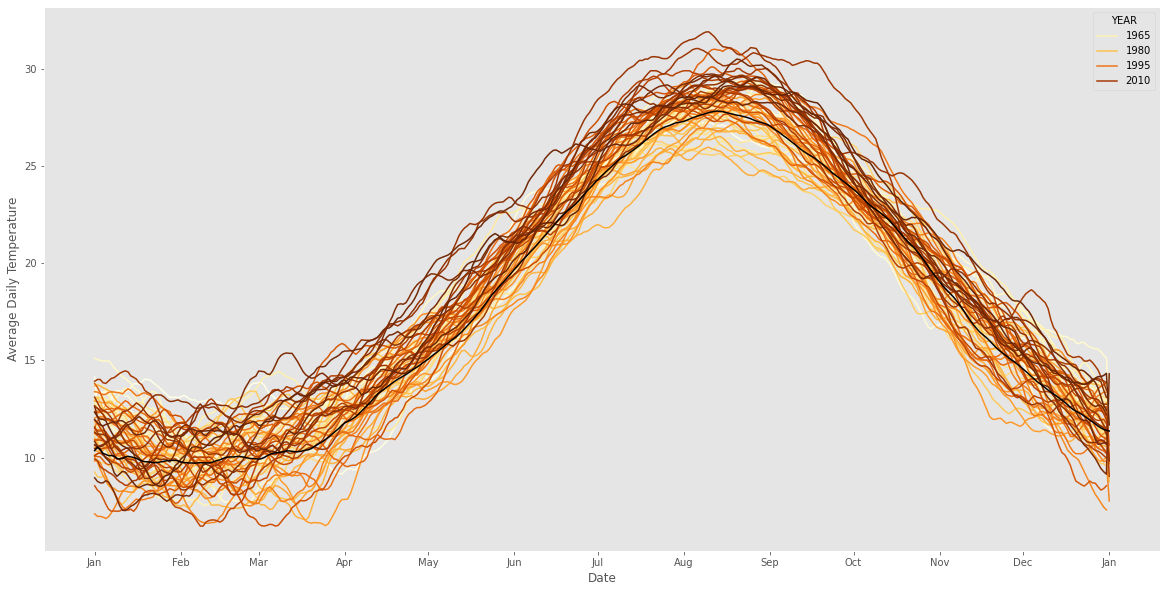

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
ax.grid(False)
# Setting monthly ticks https://stackoverflow.com/a/46556504
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.style.use('ggplot')
ax.set_ylabel("Average Daily Temperature")
ax.set_xlabel("Date")
ax = sns.lineplot(x="DAY", y="30day_rolling_avg", data=data, hue="YEAR", palette="YlOrBr")
ax.plot("rolled_avg", data=avgs_for_1974_1999, color="black")
plt.show()

### Conclusions
We notice that darker hues are on the top, thus temperatures have increased the later years. Generally, temperatures over the years follow a similar distribution which about each year goes upper. During the latest months of each year, average temeratures are closer to the baseline, while during the first months and summer(August and Septeber) we can notice a more significant deviation. 

## Extreme Temperature Events

We will create a dictionary with the percentage of extreme events for each year. We calculate this percentage by counting the days when the difference between this day's average and the average of the years 1974-1999 was greater than 10%. 

In [41]:
perc_of_extremes = {}
grouped_by_year = data.groupby(data.YEAR)
perc_of_extremes = dict.fromkeys(grouped_by_year.groups.keys())
for n, v in grouped_by_year:
    v.reset_index(inplace=True)
    perc_of_extremes[n] = v.loc[v.TAVG - avgs_for_1974_1999.avg > 0.1 * avgs_for_1974_1999.avg].TAVG.count() / v.shape[0]
perc_of_extremes

{1955: 0.3561643835616438,
 1956: 0.3224043715846995,
 1957: 0.32602739726027397,
 1958: 0.3780821917808219,
 1959: 0.2493150684931507,
 1960: 0.40437158469945356,
 1961: 0.3863013698630137,
 1962: 0.42191780821917807,
 1963: 0.3917808219178082,
 1964: 0.22950819672131148,
 1965: 0.3178082191780822,
 1966: 0.4438356164383562,
 1967: 0.3041095890410959,
 1968: 0.3114754098360656,
 1969: 0.25753424657534246,
 1970: 0.26575342465753427,
 1971: 0.2136986301369863,
 1972: 0.22131147540983606,
 1973: 0.2602739726027397,
 1974: 0.18082191780821918,
 1975: 0.2684931506849315,
 1976: 0.2103825136612022,
 1977: 0.32054794520547947,
 1978: 0.21095890410958903,
 1979: 0.3041095890410959,
 1980: 0.16939890710382513,
 1981: 0.25205479452054796,
 1982: 0.13972602739726028,
 1983: 0.13424657534246576,
 1984: 0.16939890710382513,
 1985: 0.24383561643835616,
 1986: 0.29041095890410956,
 1987: 0.1780821917808219,
 1988: 0.1721311475409836,
 1989: 0.24383561643835616,
 1990: 0.3287671232876712,
 1991: 0.1

We will calculate the percentage of extreme events for the years 1974-1999.

In [42]:
values = [perc_of_extremes[k] for k in range(1974, 1999 + 1)]
perc_of_extremes_1974_1999 = sum(values) / len(values)
perc_of_extremes_1974_1999

0.24992687154151333

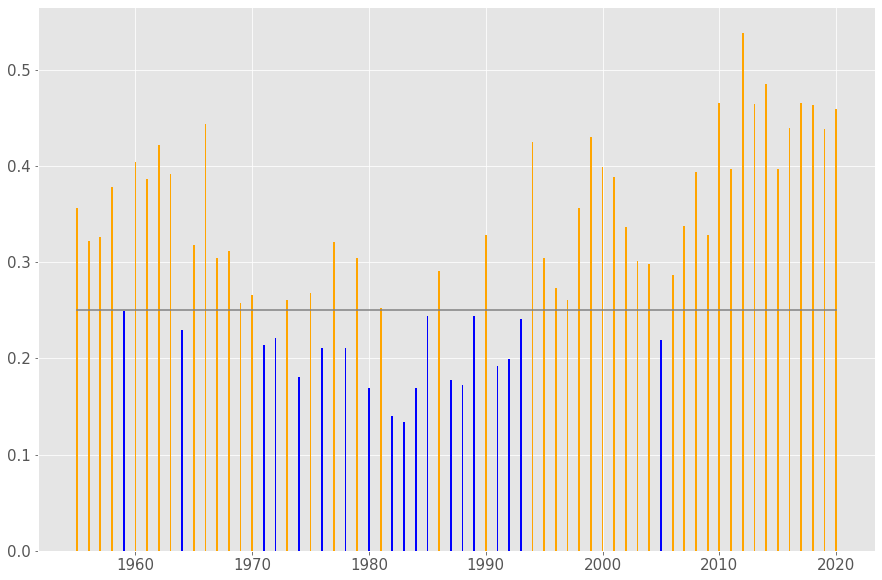

In [43]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='both', which='major', labelsize=15)
clrs = ['blue' if (perc < perc_of_extremes_1974_1999) else 'orange' for perc in perc_of_extremes.values()]
ax.bar(width=0.15, x=list(perc_of_extremes.keys()), height=perc_of_extremes.values(), align='center', color=clrs, edgecolor='none')
ax.plot(perc_of_extremes.keys(), [perc_of_extremes_1974_1999] * (2020 - 1955 + 1), color="grey")
plt.show()

### Conclusions
After 2006 more than 30% of each year's days have extreme events and the fact that this percentage reaches almost 50% annualy could be worrying, since they can cause discomfort. This may also imply that a new baseline should be established in the future, since most temperatures will be considered extreme.

## Precipitation

We will calculate the average precipitation for the rainy days (that is why we count only the days when ```PRCP``` is > 0.2).

In [44]:
rain = pd.DataFrame({"prec": data.loc[data.PRCP > 0.2].groupby(data.YEAR).mean().PRCP})
rain.reset_index(inplace=True)
rain['prec_rolled'] = rain.prec.rolling(10, min_periods=1).mean()
rain

,YEAR,prec,prec_rolled
0,1955,8.169701,8.169701
1,1956,5.628640,6.899171
2,1957,4.583545,6.127296
3,1958,5.388708,5.942649
4,1959,3.752070,5.504533
...,...,...,...
61,2016,6.403474,6.036659
62,2017,6.626578,6.143447
63,2018,7.292731,6.327398
64,2019,9.831552,6.773933


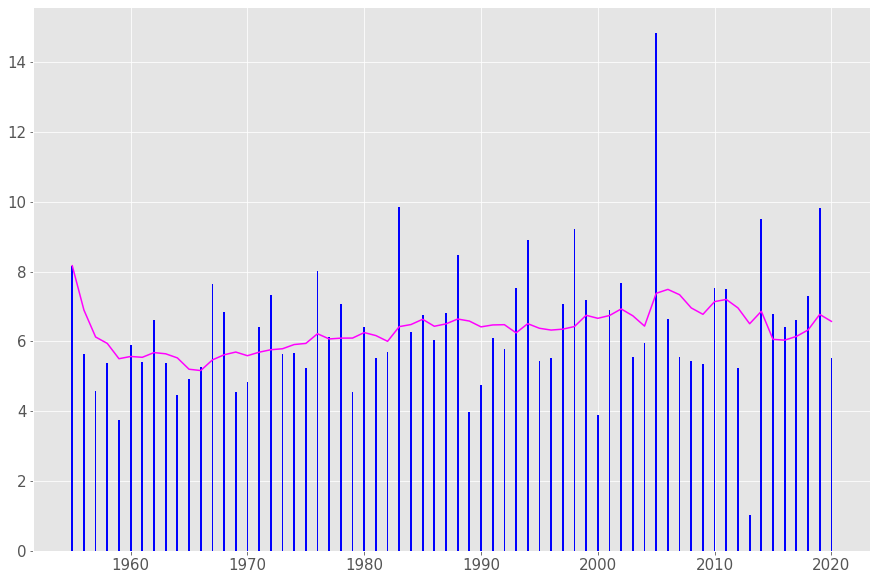

In [45]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='both', which='major', labelsize=15)
clrs = ['blue']
ax.bar(width=0.15, x="YEAR", height="prec", data=rain, align='center', color=clrs, edgecolor='none')
ax.plot("YEAR", "prec_rolled", data=rain, color="magenta")
plt.show()

### Conclusions
We can conclude from the rolling average that precipitation slightly increases till 2005, after which there is a slight fall. Generally, we can say that precipitation increases and can be observed on the intense rainfalls that hit Athens during the latest years. 2005 appears to be the year with the most intense rainfalls. As we saw from the previous plot, during that year, the temperatures were relatively close to the baseline and they did not follow the rise that was a characteristic of the later years, so this may imply that heat and precipitation do not grow with the same rhythm. This can be seen by noticing that the years with more extreme heat events had less precipitation, compared to the others.